In [292]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 9,6
import seaborn as sns
import numpy as np

Импортируем данные

In [293]:
train=pd.read_excel('../SB_test/train.xlsx')
test=pd.read_excel('../SB_test/test.xlsx')

In [294]:
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,31,blue-collar,married,high.school,no,no,no,cellular,jul,wed,248,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
1,31,blue-collar,married,basic.9y,no,yes,yes,telephone,may,wed,248,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0
2,29,entrepreneur,married,high.school,no,yes,no,cellular,jul,fri,668,2,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1
3,48,blue-collar,married,basic.4y,no,no,no,cellular,may,mon,420,7,999,1,failure,-1.8,92.893,-46.2,1.244,5099.1
4,33,admin.,married,high.school,no,yes,no,cellular,nov,tue,125,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8


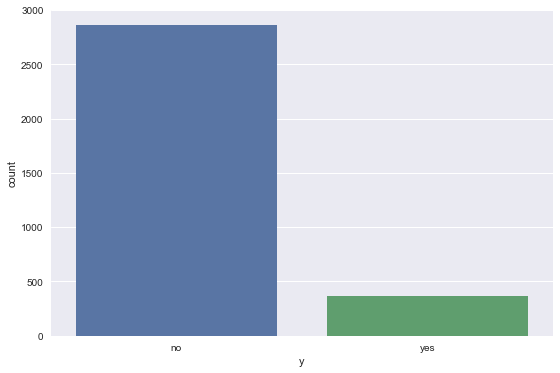

In [295]:
sns.countplot(x=train['y'],data=train);

Бинаризуем целевую переменную

In [296]:
train['y']=train.y.apply(lambda x: 0 if x=='no' else 1)

Удаляем все строчки по которым есть неизвестные данные

In [297]:
train=train.replace('unknown', np.nan)
train=train.dropna()

test=test.replace('unknown', np.nan)
test=test.dropna()

In [298]:
del train['default']
del test['default']

Бинаризуем данные колонки, т.к. у них остаётся только по 2 значения

In [299]:
train['housing']=train.housing.apply(lambda x: 0 if x=='no' else 1)
train['loan']=train.loan.apply(lambda x: 0 if x=='no' else 1)
train['contact']=train.contact.astype('category').cat.codes

test['housing']=test.housing.apply(lambda x: 0 if x=='no' else 1)
test['loan']=test.loan.apply(lambda x: 0 if x=='no' else 1)
test['contact']=test.contact.astype('category').cat.codes

Переводим месяц и день в числовые значения

In [300]:
train['month']=train.month.astype('category').cat.codes
train['day_of_week']=train.day_of_week.astype('category').cat.codes

test['month']=test.month.astype('category').cat.codes
test['day_of_week']=test.day_of_week.astype('category').cat.codes

Все остальные фичи переводим в числовые значения

In [301]:
X_train=pd.get_dummies(train)
y_train=X_train['y']

X_test=pd.get_dummies(test)

In [302]:
del X_train['y']
del X_test['education_illiterate']

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Попробуем кластеризовать данные, чтобы увидеть возможные зависимости<br>
Для этого сначала масштабируем все данные к одному порядку

In [304]:
scaller=StandardScaler()

In [305]:
scaller.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [306]:
X_train_sc=scaller.transform(X_train)

In [307]:
X_train_sc=pd.DataFrame(X_train_sc, columns=X_train.columns)

In [308]:
X_train_sc.head()

,age,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,...,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.887697,0.905681,-0.438879,-0.678882,0.699646,-1.459200,0.872255,-0.194256,0.218599,-0.365012,...,-0.671657,-0.283673,-0.23788,2.580747,-0.556407,-0.408647,-0.753136,-0.358362,0.429349,-0.208969
1,0.003397,-1.104141,-0.438879,1.473011,0.699646,-1.459200,0.337152,0.583418,0.218599,-0.365012,...,1.488855,-0.283673,-0.23788,-0.387485,1.797245,-0.408647,-0.753136,-0.358362,0.429349,-0.208969
2,-1.382749,0.905681,-0.438879,1.473011,-0.145944,1.390055,-0.114460,-0.583093,0.218599,-0.365012,...,-0.671657,-0.283673,-0.23788,-0.387485,1.797245,-0.408647,-0.753136,-0.358362,0.429349,-0.208969
3,0.795481,0.905681,-0.438879,-0.678882,1.122441,-0.746887,-0.755824,-0.583093,0.218599,-0.365012,...,-0.671657,-0.283673,-0.23788,-0.387485,-0.556407,-0.408647,1.327782,-0.358362,0.429349,-0.208969
4,-0.689676,-1.104141,-0.438879,-0.678882,1.968030,-0.034573,-0.490170,0.194581,0.218599,3.096808,...,1.488855,-0.283673,-0.23788,-0.387485,-0.556407,-0.408647,1.327782,2.790478,-2.329105,-0.208969


Используя PCA снижаем размерность, чтобы можно было визуализировать

In [309]:
pca=PCA(n_components=2)

In [310]:
ppl=pca.fit_transform(X_train_sc)

То что получилось объяснять 20% от изначальных данных

In [311]:
pca.explained_variance_ratio_.sum()

0.19811727937375256

Видим, что есть несколько кластеров

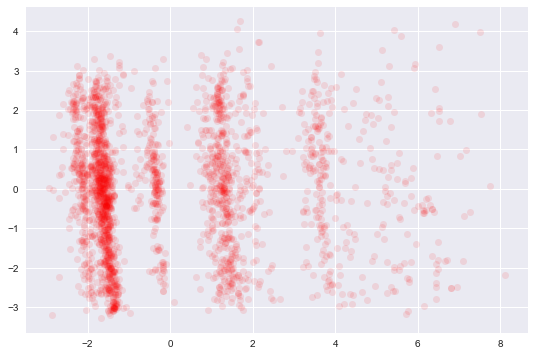

In [312]:
plt.plot(ppl[:,0],ppl[:,1], 'ro', alpha=0.1);

C помощью KMeans выделяем кластеры и визуализируем

In [313]:
kmeans=KMeans(n_clusters=3)

In [314]:
kmeans.fit(X_train_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [315]:
cluster_labels=kmeans.predict(X_train_sc)

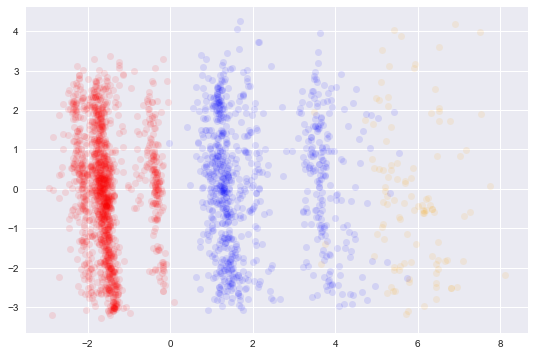

In [316]:
for i, color in zip(range(7),{'blue','red','green','black','orange','yellow'}):
    t=ppl[cluster_labels==i]
    plt.plot(t[:,0], t[:,1], 'ro', alpha=0.1, c=color)

Добавляем их как новая фича

In [282]:
X_train['cluster_labels']=cluster_labels #не дало прироста

Разбиваем выборку для валидации

In [317]:
x_train, x_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Строим модель и валидируем и оцениваем

In [318]:
clf=KNeighborsClassifier().fit(x_train, y_train)

In [319]:
pred=clf.predict(x_val)
pred_pr=clf.predict_proba(x_val)

In [320]:
print('Accuracy: {}'.format(accuracy_score(y_val, pred)))

Accuracy: 0.9016736401673641


In [321]:
print(classification_report(y_val,pred))

             precision    recall  f1-score   support

          0       0.92      0.98      0.94       411
          1       0.75      0.45      0.56        67

avg / total       0.89      0.90      0.89       478



In [322]:
print('ROC_AUC: {}'.format(roc_auc_score(y_val, pred)))

ROC_AUC: 0.711715146893271


In [323]:
fpr,tpr, _ = roc_curve(y_val, pred_pr[:,1])

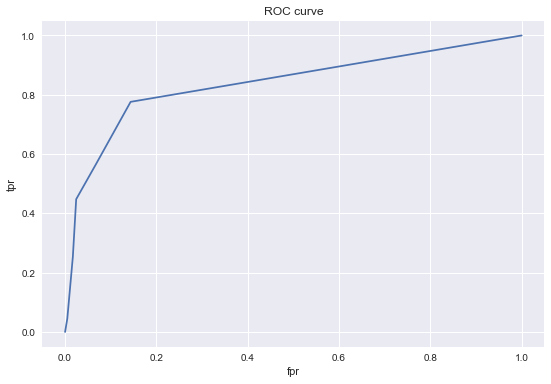

In [324]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve');

Делаем финальное предсказание

In [325]:
pred_final=clf.predict(X_test)

In [326]:
pred_final

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0,